**Develop Targeted Insurance Renewal Offers**

Please use InsuranceRenewal.csv to work on the assignment questions below. Please use Python code and
run them in the Google Colab environment.
An insurance company is developing a predictive model and wants to use the model to develop targeted renewal offers for customers who are renewing their insurance policy with the company for the first time. In general insurance customers have a high renewal rate. However, these customers are renewing for the first time, so the average renewal rate for this group is low.
The company has developed two types of renewal offers: “Renewal Offer 0” that gives no discount off the insurance premium; “Renewal Offer 1” that gives a 2% discount off the insurance premium. It wants to understand the impact of each renewal offer on the probability of customer renewals. It has randomly selected 1,000 customers who need to renew their policies for the first time in the next 60 days, and randomly assigned one of the two renewal offers to each of them. It has collected a data set, “InsuranceRenewal.csv”, on how each of the 1,000 customers responds to the renewal offer.

**Please do not preprocess the data in this assignment.
Your interpretation for any non-intercept coefficients should follow the interpretation shown in the class. Please point out the baseline group and the focal group when applicable.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy import stats

file_path = '/content/drive/MyDrive/Data/InsuranceRenewal.csv'
df = pd.read_csv(file_path)

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       1000 non-null   object 
 1   State                          1000 non-null   object 
 2   Coverage                       1000 non-null   object 
 3   Location_Code                  1000 non-null   object 
 4   Monthly_Premium_Auto           1000 non-null   int64  
 5   Months_Since_Last_Claim        1000 non-null   int64  
 6   Months_Since_Policy_Inception  1000 non-null   int64  
 7   Number_of_Open_Complaints      1000 non-null   int64  
 8   Number_of_Policies             1000 non-null   int64  
 9   Policy                         1000 non-null   object 
 10  Sales_Channel                  1000 non-null   object 
 11  Total_Claim_Amount             1000 non-null   float64
 12  Vehicle_Class                  1000 non-null   ob

In [4]:
print("Missing Values:\n", df.isna().sum())

Missing Values:
 Customer                         0
State                            0
Coverage                         0
Location_Code                    0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
Policy                           0
Sales_Channel                    0
Total_Claim_Amount               0
Vehicle_Class                    0
Vehicle_Size                     0
Renewal_Offer                    0
Response                         0
dtype: int64


## Q1.

Please build a logistic regression model with `Response` being dependent variable, and `State`, `Coverage`, `Location_Code`, `Monthly_Premium_Auto`, `Months_Since_Last_Claim`, `Months_Since_Policy_Inception`, `Number_of_Open_Complaints`, `Number_of_Policies`, `Policy`, `Sales_Channel`, `Total_Claim_Amount`, `Vehicle_Class`, `Vehicle_Size`, `Renewal_Offer` being independent variables. Please interpret the coefficients that are significant.

In [7]:
# Prepare data for logistic regression
# Convert categorical variables to dummy variables
formula = (
    "Response ~ C(State) + C(Coverage) + C(Location_Code) + Monthly_Premium_Auto + "
    "Months_Since_Last_Claim + Months_Since_Policy_Inception + Number_of_Open_Complaints + "
    "Number_of_Policies + C(Policy) + C(Sales_Channel) + Total_Claim_Amount + "
    "C(Vehicle_Class) + C(Vehicle_Size) + C(Renewal_Offer)"
)

logit_model = smf.logit(formula=formula, data=df).fit()
print(logit_model.summary())

         Current function value: 0.240018
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      966
Method:                           MLE   Df Model:                           33
Date:                Sat, 30 Nov 2024   Pseudo R-squ.:                  0.2566
Time:                        19:35:08   Log-Likelihood:                -240.02
converged:                      False   LL-Null:                       -322.88
Covariance Type:            nonrobust   LLR p-value:                 1.322e-19
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -3.8897      1.556     -2.499      0.012      -6.940      -0.840

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Baseline Group**
- Baseline Group: For categorical variables, the following baseline groups are used:
  - `State`: Baseline is the first state alphabetically (Arizona).
  - `Coverage`: Baseline is “Basic”.
  - `Location_Code`: Baseline is “Rural”.
  - `Policy`: Baseline is “Corporate L1”.
  - `Sales_Channel`: Baseline is “Agent”.
  - `Vehicle_Class`: Baseline is “Four-Door Car”.
  - `Vehicle_Size`: Baseline is “Large”.
  - `Renewal_Offer`: Baseline is “0” (no discount).

**Significant Variables**
1. Intercept (-3.8897, p = 0.012)
- Baseline probability of renewal (`Response` = 1) is very low when all predictors are at their baseline values.

2. C(`Location_Code`)[T.Suburban] (3.7197, p < 0.001)
- Customers living in Suburban areas are significantly more likely to renew their policies compared to those living in Rural areas (baseline group).
- The odds of renewal increase by e^{3.7197}=41.25 times for Suburban residents compared to Rural residents.

3. C(`Vehicle_Size`)[T.Small] (-1.0712, p = 0.029)
- Customers with Small vehicles are less likely to renew their policies compared to those with Large vehicles (baseline group).
- The odds of renewal decrease by e^{-1.0712}=0.34 times for Small vehicle owners compared to Large vehicle owners.

4. C(`Renewal_Offer`)[T.1] (2.2470, p < 0.001)
- Customers who received the 2% discount offer are significantly more likely to renew their policies compared to those who did not receive any discount (baseline group).
- The odds of renewal increase by e^{2.2470}=9.46 times for customers receiving the discount.

5. `Months_Since_Last_Claim` (-0.0272, p = 0.031)
- For every additional month since the last claim, the likelihood of renewal decreases slightly.
- The odds of renewal decrease by approximately e^{-0.0272}=0.973 times for each additional month.

6. `Number_of_Policies` (-0.1168, p = 0.033)
- Customers with more policies are slightly less likely to renew their insurance.
- The odds of renewal decrease by e^{-0.1168}=0.89 times for each additional policy the customer holds.

7. `Total_Claim_Amount` (-0.0055, p < 0.001)
- Higher total claim amounts reduce the likelihood of renewal.
- For every unit increase in the total claim amount, the odds of renewal decrease by e^{-0.0055}=0.9945 times.

**Insights**
- Offering a 2% discount (`Renewal Offer`= 1) significantly increases the likelihood of renewal.
- Customers in Suburban areas are much more likely to renew than those in Rural areas, suggesting geographic targeting.
- Owning a Small vehicle reduces the renewal likelihood, hinting at a possible demographic preference or dissatisfaction among these customers.
- Factors such as the time since the last claim, the number of policies, and the total claim amount negatively impact renewal probability, potentially signaling risk-averse behavior from the company or dissatisfaction among high-claim customers.

## Q2.

Please use the model in Q1, make predictions, and save the predicted probability of `Response` being 1 as a new variable `pred_resp_prob`. Please calculate the mean for `pred_resp_prob` for observations with `Renewal_Offer` being 0. Please calculate the mean for `pred_resp_prob` for observations with `Renewal_Offer` being 1. Please interpret the results.

In [9]:
# Generate predicted probabilities
df['pred_resp_prob'] = logit_model.predict()

print(df['pred_resp_prob'].head())

# Calculate the mean predicted probability for each Renewal_Offer group
mean_prob_offer_0 = df[df['Renewal_Offer'] == 0]['pred_resp_prob'].mean()
mean_prob_offer_1 = df[df['Renewal_Offer'] == 1]['pred_resp_prob'].mean()

# Print the results
print(f"Mean predicted probability for Renewal_Offer 0: {mean_prob_offer_0:.4f}")
print(f"Mean predicted probability for Renewal_Offer 1: {mean_prob_offer_1:.4f}")

0    0.276454
1    0.218143
2    0.110807
3    0.068596
4    0.365751
Name: pred_resp_prob, dtype: float64
Mean predicted probability for Renewal_Offer 0: 0.0260
Mean predicted probability for Renewal_Offer 1: 0.1720


**Interpretation**

**1. `pred_resp_prob` Values**
- The `pred_resp_prob` column contains the predicted probabilities for each customer that Response = 1 (ex. the customer renews their insurance policy).

**2. Mean Predicted Probability for Each `Renewal_Offer` Group**
- For `Renewal_Offer` = 0 (No Discount):
  - The mean predicted probability is 0.0260 (2.6%).
  - This indicates that, on average, customers who did not receive a discount have a very low likelihood of renewing their policy.
- For `Renewal_Offer` = 1 (2% Discount):
  - The mean predicted probability is 0.1720 (17.2%).
  - This shows that customers who received the 2% discount are much more likely to renew their policy compared to those who received no discount.

**3. Comparison and Insights**
- The average predicted renewal probability for customers with a 2% discount (`Renewal_Offer` = 1) is significantly higher than that for customers with no discount (`Renewal_Offer` = 0).
- Specifically, the mean probability for the discount group is approximately 6.6 times higher than for the no-discount group (0.1720/0.0260 = 6.6).
- This result suggests that the 2% discount offer positively impacts the likelihood of renewal.

**4. Business Implication**
- The analysis supports the use of the 2% discount as an effective incentive for encouraging customers to renew their policies.
- The company may consider targeting first-time renewal customers with such offers to improve overall renewal rates, especially since the baseline renewal probability (without a discount) is extremely low.

## Q3.

 Please use the model in Q1. Please create 10 deciles (in reverse order from decile 1 to decile 10) based on the new variable `pred_resp_prob`, and save this variable that indicates the 10 deciles. Please create a decile lift chart. Please interpret the chart. How many deciles have actual response rate higher than 20%?

<ipython-input-10-4537b54eb816>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_summary = df.groupby('decile').agg(


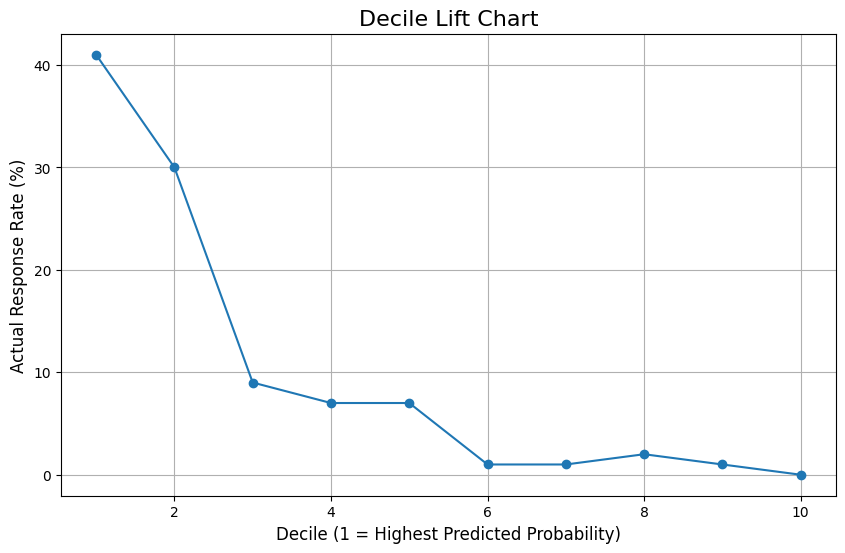

Number of deciles with actual response rate higher than 20%: 2


In [10]:
# Step 1: Create Deciles (Reverse Order)
# Sort data by predicted probabilities in descending order
df = df.sort_values('pred_resp_prob', ascending=False).reset_index(drop=True)

# Create deciles: 10 groups based on `pred_resp_prob`
df['decile'] = pd.qcut(df['pred_resp_prob'], 10, labels=range(10, 0, -1))

# Step 2: Calculate Actual Response Rate for Each Decile
decile_summary = df.groupby('decile').agg(
    total_customers=('Response', 'size'),
    actual_responses=('Response', 'sum'),
    mean_pred_prob=('pred_resp_prob', 'mean'),
)

decile_summary['actual_response_rate'] = decile_summary['actual_responses'] / decile_summary['total_customers']

# Step 3: Plot Decile Lift Chart
plt.figure(figsize=(10, 6))
plt.plot(decile_summary.index.astype(int), decile_summary['actual_response_rate'] * 100, marker='o')
plt.title('Decile Lift Chart', fontsize=16)
plt.xlabel('Decile (1 = Highest Predicted Probability)', fontsize=12)
plt.ylabel('Actual Response Rate (%)', fontsize=12)
plt.grid(True)
plt.show()

# Step 4: Count Deciles with Actual Response Rate > 20%
high_response_deciles = (decile_summary['actual_response_rate'] > 0.20).sum()

print(f"Number of deciles with actual response rate higher than 20%: {high_response_deciles}")

**Interpretation of the Decile Lift Chart**

The chart shows the actual response rate (percentage of customers who renewed their policy) for each decile, ranked by predicted probabilities (`pred_resp_prob`) from highest to lowest.

1. Top Deciles (Deciles 1–2)
- Decile 1 has an actual response rate of approximately 40%, the highest among all deciles.
- Decile 2 has an actual response rate of approximately 30%.
- These deciles represent the top 20% of customers with the highest predicted probabilities of renewing, and the actual response rate confirms the model’s ability to identify high-response customers effectively.

2. Middle Deciles (Deciles 3–7)
- The actual response rate drops significantly in these deciles, with rates stabilizing below 20%.
- These deciles represent customers with moderate predicted probabilities, and the actual response rates align with this prediction.

3.	Lower Deciles (Deciles 8–10)
- The actual response rate is close to 0% in these deciles, indicating that customers with low predicted probabilities of renewal rarely renew their policies.
- This demonstrates that the model effectively distinguishes low-response customers.

**How Many Deciles Have Actual Response Rates Higher Than 20%?**

- From the chart, Decile 1 and Decile 2 have actual response rates exceeding 20%.
- Therefore, there are **2 deciles** with response rates **higher than 20%**.

**Business Insights**

1. Effective Targeting:
- The top two deciles (Deciles 1 and 2) show much higher response rates compared to others, suggesting these customers are the most likely to renew.
- The company should focus its targeted renewal offers (ex. 2% discounts) on customers in these deciles to maximize effectiveness and cost-efficiency.

2. Resource Allocation:
- For deciles 3 and below, response rates drop significantly, making it less effective to allocate marketing resources for renewal offers in these groups.

3. Model Validation:
- The lift chart validates the model’s ability to rank customers by renewal likelihood, as the actual response rates align with the predicted probabilities.

## Q4.

 Please use the model in Q1. Please use 0.2 as the cutoff and recode `pred_resp_prob` into a dummy variable that is 1 for values higher than or equal to 0.2 and 0 otherwise. What is the sensitivity? What is the specificity? If we increase this cutoff, would sensitivity increase or decrease? If we increase this cutoff, would specificity increase or decrease?

In [11]:
from sklearn.metrics import confusion_matrix

# Step 1: Recode pred_resp_prob into a dummy variable based on the cutoff
df['predicted_dummy'] = (df['pred_resp_prob'] >= 0.2).astype(int)

# Step 2: Calculate the confusion matrix
cm = confusion_matrix(df['Response'], df['predicted_dummy'], labels=[1, 0])  # Order: Positive, Negative

# Extract true positives, false positives, true negatives, and false negatives
tp = cm[0, 0]  # True Positives
fn = cm[0, 1]  # False Negatives
fp = cm[1, 0]  # False Positives
tn = cm[1, 1]  # True Negatives

# Step 3: Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)  # Sensitivity = TP / (TP + FN)
specificity = tn / (tn + fp)  # Specificity = TN / (TN + FP)

# Step 4: Display results
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

Sensitivity: 0.6667
Specificity: 0.8746


**If we increase this cutoff, would sensitivity increase or decrease? If we increase this cutoff, would specificity increase or decrease?**

Based on the provided sensitivity (0.6667) and specificity (0.8746), here’s how changing the cutoff affects sensitivity and specificity:

**[Effect of Increasing the Cutoff]**

**1. Sensitivity:**
- **Sensitivity will decrease.**
When the cutoff is increased, fewer predicted probabilities(`pred_resp_prob`) meet or exceed the threshold to be classified as 1.
- This results in:
  - More false negatives(FN) (actual 1s classified as 0).
  - Fewer true positives(TP).
- Sensitivity, which is the proportion of true positives among actual positives(TP/(TP+FN)), will decrease because the numerator(TP) decreases while the denominator remains constant.

**2. Specificity:**
- **Specificity will increase.**
When the cutoff is increased, more predicted probabilities fall below the threshold and are classified as 0.
- This results in:
  - Fewer false positives(FP) (actual 0s classified as 1).
  - More true negatives(TN).
- Specificity, which is the proportion of true negatives among actual negatives(TN/(TN+FP)), will increase because the numerator(TN) increases while the denominator remains constant.

> Increasing the cutoff decreases sensitivity and increases specificity. This trade-off reflects the balance between correctly identifying positives (sensitivity) and negatives (specificity).

**[Business Implication]**

- If the company values identifying as many renewing customers as possible(high sensitivity), it should use a lower cutoff.
- If the company values avoiding offering discounts to non-renewing customers(high specificity), it should use a higher cutoff.

## Q5.

Please use the model in Q1. Please predict the probability of response for each customer with `Renewal Offer` 0 and with `Renewal Offer` 1. Calculate the additional annual revenue generated by offering each customer `Renewal Offer` 1 instead of `Renewal Offer` 0, and save the results as `RevenueLift`. Please analyze `RevenueLift` and other variables. What insights can you derive from this analysis?

RevenueLift Summary:
count    1.000000e+03
mean     1.581531e+02
std      1.735311e+02
min      1.400169e-13
25%      4.144540e+01
50%      1.022873e+02
75%      2.163246e+02
max      1.362095e+03
Name: RevenueLift, dtype: float64

Correlation Matrix:
                      RevenueLift  Monthly_Premium_Auto  pred_resp_prob
RevenueLift              1.000000              0.445899        0.625666
Monthly_Premium_Auto     0.445899              1.000000        0.050969
pred_resp_prob           0.625666              0.050969        1.000000


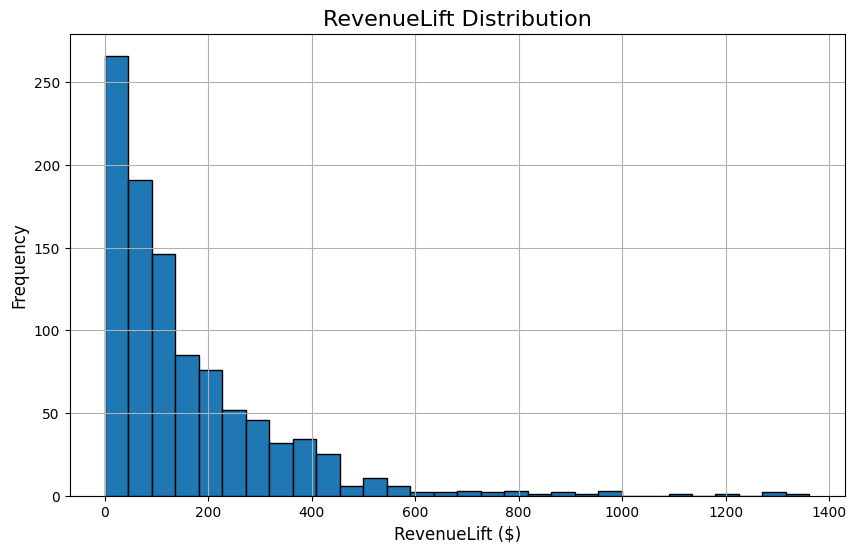

In [12]:
# Create a copy of the dataset to simulate Renewal Offer scenarios
df_offer_0 = df.copy()
df_offer_1 = df.copy()

# Set Renewal Offer to 0 and 1 for prediction
df_offer_0['Renewal_Offer'] = 0
df_offer_1['Renewal_Offer'] = 1

# Predict probabilities for both scenarios
df_offer_0['pred_resp_prob_0'] = logit_model.predict(df_offer_0)
df_offer_1['pred_resp_prob_1'] = logit_model.predict(df_offer_1)

# Calculate RevenueLift
df['RevenueLift'] = (
    (df_offer_1['pred_resp_prob_1'] - df_offer_0['pred_resp_prob_0']) * df['Monthly_Premium_Auto'] * 12
)

# Analyze RevenueLift
revenue_lift_summary = df['RevenueLift'].describe()

# Print summary of RevenueLift
print("RevenueLift Summary:")
print(revenue_lift_summary)

# Correlation analysis
correlation_matrix = df[['RevenueLift', 'Monthly_Premium_Auto', 'pred_resp_prob']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize RevenueLift distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['RevenueLift'], bins=30, edgecolor='black')
plt.title('RevenueLift Distribution', fontsize=16)
plt.xlabel('RevenueLift ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

**Analysis of RevenueLift**

1. RevenueLift Distribution

- Summary Statistics:
  - Mean RevenueLift: 158.15 dollars per customer
  - Median RevenueLift(50th Percentile): 102.29 dollars, showing that half of the customers have a lift less than this amount.
  - 25th Percentile: 41.44 dollars, indicating that a quarter of the customers have a RevenueLift less than this.
  - 75th Percentile: 216.32 dollars, showing the top quarter of customers with higher lift values.
  - Maximum RevenueLift: 1,362.09 dollars, representing the customer with the largest additional revenue potential from the 2% discount.

- Distribution Insights:
  - The histogram indicates a right-skewed distribution, where the majority of customers have a low to moderate RevenueLift, while a smaller number of customers have very high RevenueLift.
  - A significant portion of the lift is concentrated in the lower range (0~200 dollars), suggesting that for many customers, the 2% discount provides limited additional revenue.

2. Correlation Matrix

- RevenueLift vs. Monthly_Premium_Auto (Correlation = 0.4459):
  - Positive correlation indicates that customers with higher monthly premiums tend to have higher RevenueLift. This is expected since RevenueLift depends on annual premiums (Monthly_Premium_Auto × 12).
- RevenueLift vs. pred_resp_prob (Correlation = 0.6257):
  - Strong positive correlation suggests that customers who already have a high probability of renewal (pred_resp_prob) tend to experience higher RevenueLift.
  - This highlights that targeting customers with high baseline probabilities still results in additional revenue gains with the discount.
- Monthly_Premium_Auto vs. pred_resp_prob (Correlation = 0.0510):
  - Weak correlation suggests that monthly premiums are not strongly related to the baseline renewal probability.

**Insights**

1. Customer Segmentation Based on RevenueLift:
- High RevenueLift Customers:
  - Customers in the top quartile (216.32~1,362.09 dollars) are prime candidates for targeted discounts.
  - These customers provide significant additional revenue, especially those with high Monthly_Premium_Auto.
- Low RevenueLift Customers:
  - Customers with RevenueLift near 0 dollars (ex. first quartile) may not justify the cost of offering discounts.
  - Alternative strategies (ex. focusing on other engagement methods) might be more effective for these customers.

2. Premium-Based Targeting:
- Customers with higher Monthly_Premium_Auto values yield higher RevenueLift, indicating that targeting high-premium customers with discounts provides better revenue outcomes.

3. Predicted Probabilities and RevenueLift:
- The strong correlation between pred_resp_prob and RevenueLift suggests that even customers with higher renewal probabilities can still generate significant incremental revenue with the discount.
- It may be beneficial to include these customers in the target audience for the 2% discount.

4.	Efficiency of Discount Allocation:
- The skewed distribution indicates that only a subset of customers benefits significantly from the discount.
- Prioritizing high-premium and high-lift customers ensures marketing resources are allocated efficiently.


**Recommendations**

1. Focus on High RevenueLift Customers:
- Target the top quartile of customers with personalized renewal offers.
- Use Monthly_Premium_Auto and pred_resp_prob as segmentation variables to identify these customers.

2. Refine Discount Strategy:
- Consider offering tiered discounts for different customer groups, as not all customers contribute equally to revenue lift.

3. Alternative Approaches for Low-Lift Customers:
- For customers in the lower quartiles, explore non-discount methods like improved engagement or loyalty programs to boost renewal rates.

## Q6.

Please use the model in Q1. Assume we are focusing our retention efforts on customers in decile 2. Using the cash flows over the next 6 years, calculate the Customer Lifetime Value (CLV). Assume that annual profit equals 15% of annual insurance premium, and the interest rate is 6%. Additionally, assume the same renewal offer is provided annually to each customer over the next 6 years. For each customer, calculate the CLV with `Renewal Offer` 0, the CLV with `Renewal Offer` 1, and the incremental CLV.

CLV Summary:
       CLV_Offer_0  CLV_Offer_1  Incremental_CLV
count   100.000000   100.000000       100.000000
mean     33.610839   210.475677       176.864838
std      31.746594   105.889721        78.686411
min      12.378706    98.583980        86.205274
25%      19.109655   144.622488       125.063619
50%      23.735199   175.349160       152.108734
75%      30.590210   230.353461       199.896175
max     208.019737   767.021390       559.001653


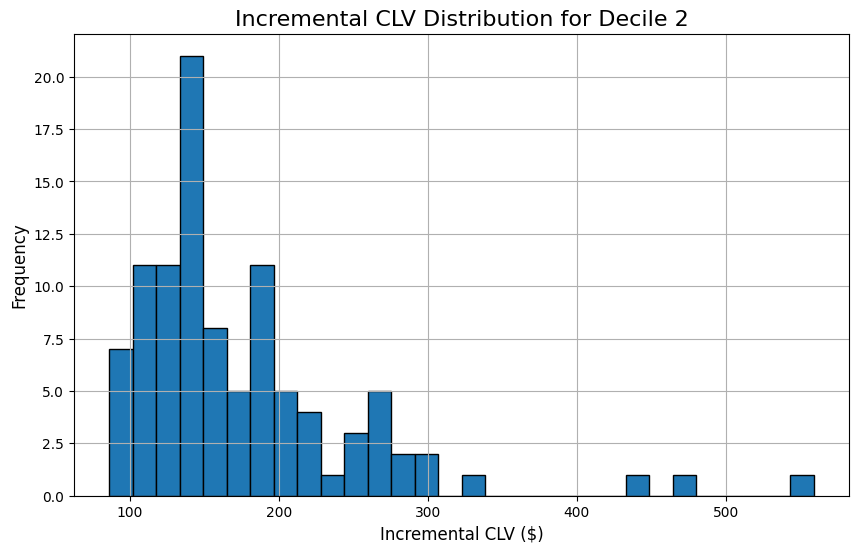

In [16]:
# Filter for Decile 2 customers
decile_2_customers = df[df['decile'] == 2].copy()

# Constants
profit_margin = 0.15  # 15% of annual premium
interest_rate = 0.06  # 6% discount rate
years = 6  # 6 years of cash flow

# Calculate annual profit (Monthly Premium × 12 × Profit Margin)
decile_2_customers['Annual_Profit'] = decile_2_customers['Monthly_Premium_Auto'] * 12 * profit_margin

# Merge Renewal Offer probabilities from df_offer_0 and df_offer_1
# Merge 'pred_resp_prob_0' from df_offer_0 based on 'Customer' ID
decile_2_customers = decile_2_customers.merge(
    df_offer_0[['Customer', 'pred_resp_prob_0']], on='Customer', how='left'
)
# Merge 'pred_resp_prob_1' from df_offer_1 based on 'Customer' ID
decile_2_customers = decile_2_customers.merge(
    df_offer_1[['Customer', 'pred_resp_prob_1']], on='Customer', how='left'
)

# Function to calculate CLV for a given customer
def calculate_clv(profit, renew_prob, years, interest_rate):
    """Calculate CLV for a customer over a given time horizon."""
    return sum((profit * renew_prob) / ((1 + interest_rate) ** t) for t in range(1, years + 1))

# Calculate CLV for Renewal Offer 0
decile_2_customers['CLV_Offer_0'] = decile_2_customers.apply(
    lambda x: calculate_clv(x['Annual_Profit'], x['pred_resp_prob_0'], years, interest_rate), axis=1
)

# Calculate CLV for Renewal Offer 1
decile_2_customers['CLV_Offer_1'] = decile_2_customers.apply(
    lambda x: calculate_clv(x['Annual_Profit'], x['pred_resp_prob_1'], years, interest_rate), axis=1
)

# Calculate Incremental CLV (difference between Offer 1 and Offer 0)
decile_2_customers['Incremental_CLV'] = (
    decile_2_customers['CLV_Offer_1'] - decile_2_customers['CLV_Offer_0']
)

# Summary statistics for CLV
clv_summary = decile_2_customers[['CLV_Offer_0', 'CLV_Offer_1', 'Incremental_CLV']].describe()
print("CLV Summary:")
print(clv_summary)

# Visualize Incremental CLV distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(decile_2_customers['Incremental_CLV'], bins=30, edgecolor='black')
plt.title('Incremental CLV Distribution for Decile 2', fontsize=16)
plt.xlabel('Incremental CLV ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

**1. Summary of Results**

**CLV with Renewal Offer 0 (CLV_Offer_0)**

- Mean: 33.61 dollars
- Range: From 12.38 to 208.02 dollars
- Observation: Without a discount, customers in Decile 2 have a relatively low CLV due to lower renewal probabilities. This indicates that focusing retention efforts solely on these customers without incentives may not yield significant long-term profits.

**CLV with Renewal Offer 1 (CLV_Offer_1)**

- Mean: 210.48 dollars
- Range: From 98.58 to 767.02 dollars
- Observation: The introduction of the 2% discount significantly increases CLV across all customers in Decile 2. This demonstrates that the discount effectively boosts long-term value by increasing renewal probabilities.

**Incremental CLV**

- Mean: 176.86 dollars
- Range: From 86.20 to 559.00 dollars
- Observation: Incremental CLV is positive for all customers, meaning the discount consistently adds value. The large mean incremental CLV indicates that the discount is a profitable strategy for Decile 2 customers.


**2. Graph Interpretation**

The histogram for Incremental CLV highlights:

- **Majority Range:**
  - Most customers have incremental CLVs between 100 and 200 dollars.
  - This suggests that the 2% discount yields a substantial lift in lifetime value for the majority of Decile 2 customers.
- **Outliers:**
  - A small number of customers exhibit incremental CLVs above 400 dollars.
  - These customers represent high-potential opportunities where the 2% discount generates outsized returns.

**3. Insights for Retention Efforts**

- Positive Incremental CLV:
  - Incremental CLV is positive for all Decile 2 customers, confirming that offering the 2% discount is a profitable retention strategy for this group.
  - On average, each Decile 2 customer contributes 176.86 dollars more in lifetime value with the discount.

- High CLV Customers:
  - Customers with higher incremental CLVs (ex. 300 dollars or more) represent priority targets for retention efforts. These customers yield the greatest financial returns from the 2% discount.

- Low CLV Customers:
  - Even customers at the lower end (incremental CLV of ~ 86 dollars) benefit from the discount. This suggests the strategy is broadly applicable within Decile 2.
- Long-Term Profitability:
  - The large increase in mean CLV from 33.61 to 210.48 dollars underscores the long-term profitability of retaining Decile 2 customers with the 2% discount.

**Conclusion**

The calculated CLV values, incremental CLV, and the provided graph effectively answer the question and provide actionable insights. The results strongly support focusing retention efforts on Decile 2 customers with the 2% discount, as it consistently drives significant long-term value across the customer segment.